In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Physical Parameters
plate_length = 50 #mm
plate_width = 50  #mm
alpha = 110 #How quickly heat spreads through the material
time = 4
nodes = 50


In [ ]:
# Numerical Parameters
dx = plate_length / nodes
dy = plate_width / nodes
dt = min((dx**2 / (4*alpha)),(dy**2 / (4*alpha)))
sim_time = int(time / dt)

In [ ]:
# Stability Check parameters
if dt > 0.5 * dx**2 / alpha:
  print("Stability Condition Not Satisfied")
else:
  print("Stability Condition Satisfied")


Stability Condition Satisfied


In [ ]:
u = np.zeros((nodes,nodes)) + 25 #Initial plate temp = 25 degrees

# Boundary Conditions

u[0, :] = 100  # Upper initial temp is 100
u[-1, :] = 100  # Lower initial temp is 100
u[:, 0] = 0
u[:, -1] = 0

2D Equation in continous form is ∂u/∂t = α(∂²u/∂x² + ∂²u/∂y²)

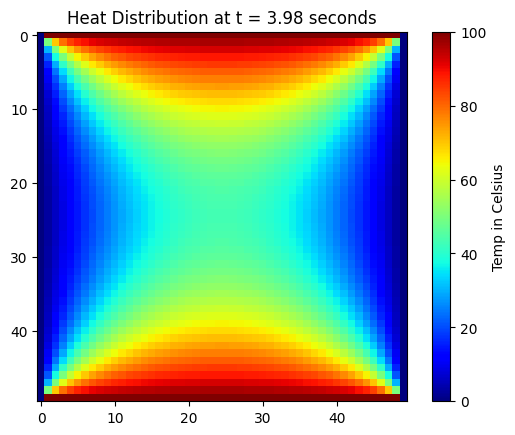

In [ ]:
from IPython.display import clear_output
fig = plt.figure()
plt.ion()


for t in range(sim_time):
  u_new = u.copy()
  for i in range(1, nodes-1):
    for j in range(1, nodes-1):
      u_new[i, j] = u[i, j] + (alpha * dt) * (u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1] - 4*u[i, j]) / (dx**2 + dy**2) # Heat diffusion terms to achieve convergence
  u = u_new.copy()

  # Plot the current temperature distribution
  if t % 50 == 0:
    # Print average temp at each iteration
    print(f"Average Temperature at t = {t*dt:.2f} seconds: {np.mean(u):.2f} degrees Celsius")
    clear_output(wait=True)
    im = plt.imshow(u, cmap='jet', interpolation='nearest')
    plt.colorbar(im,label= 'Temp in Celsius')
    plt.title(f"Heat Distribution at t = {t*dt:.2f} seconds")
    plt.show()

